**About this problem**
* This is a multi-label problem
* The targets have 206 features (binary) with each observation containing several combinations of features
* A gbm could be used but this would entail training a separate gbm for each feature since they don't support multi-label processing. This would require a lot of time. 
* A neural network would overcome this problem.

In [45]:
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
file_paths = glob.glob("../inputs/*.csv")

re.search(pattern="[a-z]+_.*.csv", string=file_paths[0]).group(0)

file_names = [re.search(pattern="[a-z]+_.*.csv", string=file_path).group(0) for file_path in file_paths]

file_names

['sample_submission.csv',
 'test_features.csv',
 'train_drug.csv',
 'train_features.csv',
 'train_targets_nonscored.csv',
 'train_targets_scored.csv']

In [41]:
df_dict = {}

for f,p in zip(file_names, file_paths):
    df = pd.read_csv(p)
    df_dict[f] = df

In [43]:
sample_submission = pd.read_csv(file_paths[0])
test_features = pd.read_csv(file_paths[1])
train_drug = pd.read_csv(file_paths[2])
train_features = pd.read_csv(file_paths[3])
train_targets_nonscored = pd.read_csv(file_paths[4])
train_targets_scored = pd.read_csv(file_paths[5])

In [50]:
train_features.shape

(23814, 876)

In [51]:
train_features.sig_id.nunique()

23814

In [54]:
train_features.cp_type.value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [56]:
train_targets_scored.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
train_targets_scored.sum()[1:].sort_values(ascending=False)

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: object

In [62]:
train_targets_scored["5-alpha_reductase_inhibitor"].sum()

17

In [72]:
gs = train_features[[col for col in train_features.columns if "g-" in col]][:1].values.reshape(-1,1)

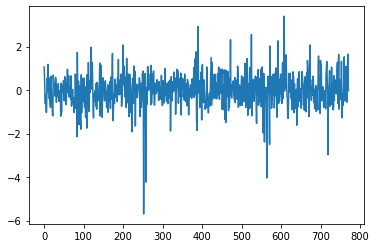

In [73]:
plt.plot(gs)

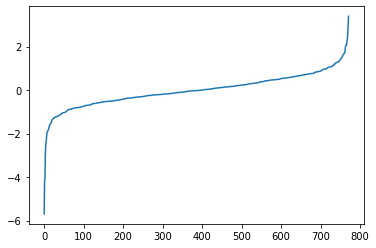

In [74]:
plt.plot(sorted(gs))

<AxesSubplot:ylabel='Frequency'>

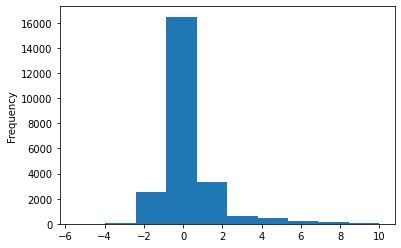

In [77]:
train_features["g-0"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

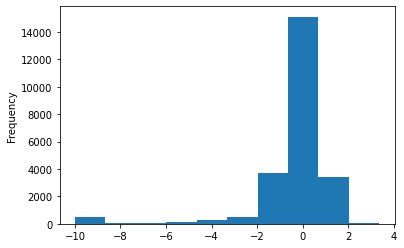

In [78]:
train_features["c-0"].plot(kind="hist")